In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread
#from detectBlobs import detectBlobs
from drawBlobs import drawBlobs
import numpy as np
import cv2
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_laplace
from scipy.ndimage.filters import convolve, generic_filter
%matplotlib inline

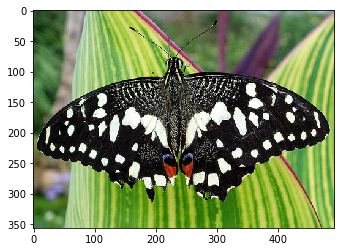

In [109]:
imageName = 'butterfly.jpg'
numBlobsToDraw = 500
imName = imageName.split('.')[0]
datadir = os.path.join('..', 'data', 'blobs')
im = imread(os.path.join(datadir, imageName))
plt.imshow(im, cmap='gray')
# BLOBS - n x 5 array with blob in each row in (x, y, radius, angle, score)
blobs = np.array([im.shape[1]/2, im.shape[0]/2, 100, 1.0])

In [123]:
import sys
def py_im2double(img):
    original_img = img.astype('float')
    img_min, img_max = np.min(im.ravel()), np.max(im.ravel())
    return (original_img - img_min) / (img_max - img_min)

# def fspecial(shape=(3,3),sigma=0.5):
#     """
#     2D gaussian mask - should give the same result as MATLAB's
#     fspecial('gaussian',[shape],[sigma])
#     """
#     m,n = [(ss-1.)/2. for ss in shape]
#     y,x = np.ogrid[-m:m+1,-n:n+1]
#     h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
#     h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
#     sumh = h.sum()
#     if sumh != 0:
#         h /= sumh
#     return h

def fspecial_log(p2, std):
    siz = int((p2-1)/2)
    x = y = np.linspace(-siz, siz, 2*siz+1)
    x, y = np.meshgrid(x, y)
    arg = -(x**2 + y**2) / (2*std**2)
    h = np.exp(arg)
    h[h < sys.float_info.epsilon * h.max()] = 0
    h = h/h.sum() if h.sum() != 0 else h
    h1 = h*(x**2 + y**2 - 2*std**2) / (std**4)
    return h1 - h1.mean()

In [111]:
processed_im = py_im2double(rgb2gray(im))
sigma = 1.6
k = np.sqrt(2) #initial_scale
scale = 1.2
n_iterations = 10
n = 12 #10-15
h, w = processed_im.shape
scale_space = np.zeros((h, w, n))

In [126]:
# Filter image with scale-normalized Laplacian at current scale and save
filter_size = 2*np.ceil(3*sigma)+1 #2*ceil(3*sigma)+1;
laplacian =  (sigma**2) * fspecial_log(filter_size, sigma) #sigma^2 * fspecial_log(filter_size, sigma)
# filtered_im = gaussian_laplace(processed_im, sigma=scale) ** 2
# # Increased scale by a factor of k
# scale *= k

# Perform non-maximum suppression in scale space.

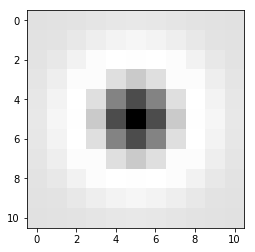

In [129]:
plt.imshow(laplacian, cmap='gray')

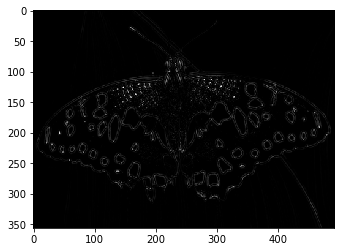

In [106]:
plt.imshow(filtered_im, cmap='gray')